# Plotting ETNP 2017 and 2018 N prod rates, adjusted by sinking particle collection rate, vs particle C:N

 - Using `python-ctd` and `pandas`

 - We don't have N2 production rates from 2019 because the exetainer samples didn't get run properly in the Quay lab.
 
  - This means there are no rates from Station P3 in the northern ODZ, since we only went there in 2019 on the KM
 
 - No incubations worked at P1 in 2017

# 2017 read in flux data, CTD data, and nutrient data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2017 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2017-fluxes.xlsx", index_col = 'sample id')

etnp_2017.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),d15N vs Air N2 (permil),d13C vs VPDB (permil),Babbin N production rates (nM N/day)
sample id,,,,,,,,,,,,,,,,
1-1_60m_+p,P1,2017,60,60,cone,88.651326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.2
2-2_50m_+p,P1,2017,50,50,cone,190.876791,NaN,NaN,329.466919,329.466919,13.75,2.122054,7.25,NaN,NaN,NaN
2-2_50m_top,P1,2017,50,50,cone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-3_150m_+p,P1,2017,150,150,net,159.375771,6.801011,53.605571,1380.747967,1380.747967,NaN,NaN,NaN,NaN,NaN,NaN
3-3_150m_top,P1,2017,150,150,net,NaN,6.330467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# keep only the rows Station = P2
# keep only rows Station P1

P2_2017 = etnp_2017.loc[(etnp_2017['Station'] == 'P2')]
P1_2017 = etnp_2017.loc[(etnp_2017['Station'] == 'P1')]

P2_2017.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),d15N vs Air N2 (permil),d13C vs VPDB (permil),Babbin N production rates (nM N/day)
sample id,,,,,,,,,,,,,,,,
1-12_73m_+p,P2,2017,73,73,cone,81.787511,NaN,103.064253,NaN,NaN,NaN,NaN,NaN,NaN,-22.9725,NaN
1-12_148m_+p,P2,2017,148,148,cone,90.820391,NaN,66.997775,NaN,NaN,NaN,NaN,NaN,NaN,-25.9195,NaN
2-14_100m_+p,P2,2017,100,100,cone,138.442644,10.613096,NaN,314.713044,314.713044,17.0,7.922464,2.0,NaN,NaN,9.4
2-14_100m_top,P2,2017,100,100,cone,NaN,10.613096,37.576112,NaN,NaN,NaN,NaN,NaN,NaN,-26.0099,NaN
2-14_150m_+p,P2,2017,150,150,net,70.654491,NaN,NaN,1920.245297,1920.245297,32.0,2.014861,3.5,NaN,NaN,21.1


In [4]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [5]:
import ctd


castP2_2017 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/skq201617s-043avg.cnv")
downP2_2017, upP2_2017 = castP2_2017.split()

# delete the scan, nbin, and flag columns

del downP2_2017['scan']
del downP2_2017['nbin']
del downP2_2017['flag']

downP2_2017.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,par
Pressure [dbar],,,,,,,,,,,,,,,,
3.0,2.982,16.58962,-106.92288,28.7428,28.7419,28.7421,33.5449,33.5546,1021.0701,21.0573,0.20173,189.660,196.33368,0.1606,96.0634,1.000000e-12
4.0,3.976,16.58962,-106.92289,28.7431,28.7431,28.7421,33.5453,33.5546,1021.0747,21.0575,0.22492,189.627,196.33235,0.1660,95.9354,1.000000e-12
5.0,4.970,16.58961,-106.92288,28.7435,28.7432,28.7424,33.5454,33.5548,1021.0788,21.0574,0.20475,189.639,196.33086,0.1615,96.0412,1.000000e-12
6.0,5.964,16.58962,-106.92288,28.7433,28.7429,28.7419,33.5455,33.5549,1021.0833,21.0576,0.20142,189.704,196.33141,0.1659,95.9365,1.000000e-12
7.0,6.958,16.58962,-106.92288,28.7438,28.7434,28.7421,33.5454,33.5547,1021.0873,21.0573,0.19712,190.067,196.33012,0.1638,95.9881,1.000000e-12


In [6]:
# Merge station flux and station cast dataframes on their indices

P2_join_2017 = P2_2017.merge(downP2_2017,on='Pressure [dbar]')

P2_join_2017.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,par
0,P2,2017,73,73,cone,81.787511,NaN,103.064253,NaN,NaN,...,34.6423,34.6487,1025.2820,24.9614,0.38130,8.217,233.87545,0.1490,96.3430,1.000000e-12
1,P2,2017,148,148,cone,90.820391,NaN,66.997775,NaN,NaN,...,34.8053,34.8129,1026.9442,26.2828,0.10563,0.405,259.33631,0.1404,96.5510,1.000000e-12
2,P2,2017,100,100,cone,138.442644,10.613096,NaN,314.713044,314.713044,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12
3,P2,2017,100,100,cone,NaN,10.613096,37.576112,NaN,NaN,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12
4,P2,2017,100,100,cone,111.165761,7.592958,NaN,NaN,NaN,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12


## Import nutrient data

In [7]:
# read the data into pandas dataframes

p2nuts_2017 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/2017-p2-nuts.xlsx", index_col = 'Cruise')

p2nuts_2017.head()

,Station,mon/dd/yyyy,hh:mm,Longitude [degrees_east],Latitude [degrees_north],Bot. Depth [m],Pressure [DB],temperature [C],Salinity [PSU],chlorophyll [MG/M^3],PAR,Oxygen [umol/l],Oxygen Sat [%},TRANSMISS [%],phosphate [umol/L],silicate [umol/L],nitrate [umol/L],nitrite uw [umol/L],ammonium [umol/L]
Cruise,,,,,,,,,,,,,,,,,,,
SKQ201617S,sta016,2017-01-08,01:06:00,-107.146,16.5387,3505,43.192,25.6248,33.8912,6.280,4.630000e-03,139.614,206.09529,94.4457,1.02,3.42,7.70,0.56,1.49
SKQ201617S,sta016,2017-01-08,01:06:00,-107.146,16.5387,3505,60.130,20.6189,34.5023,1.930,1.000000e-12,44.739,223.76825,96.6045,1.89,9.98,22.53,0.13,0.00
SKQ201617S,sta016,2017-01-08,01:06:00,-107.146,16.5387,3505,70.215,18.5609,34.5938,1.430,1.000000e-12,10.376,232.16510,96.8701,2.29,14.36,27.95,0.09,0.42
SKQ201617S,sta016,2017-01-08,01:06:00,-107.146,16.5387,3505,80.439,17.0250,34.6927,1.130,1.000000e-12,0.016,238.78685,98.2167,2.41,16.82,30.86,0.09,0.02
SKQ201617S,sta016,2017-01-08,01:06:00,-107.146,16.5387,3505,90.444,15.8179,34.7670,0.948,1.000000e-12,0.058,244.25715,98.0764,2.43,18.03,31.49,0.13,0.09


In [8]:
# read the data into pandas dataframes

p1nuts_2017 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/2017-p1-nuts.xlsx", index_col = 'Cruise')

p1nuts_2017.head()

,Station,mon/dd/yyyy,hh:mm,Longitude [degrees_east],Latitude [degrees_north],Bot. Depth [m],Pressure [DB],temperature [C],Salinity [PSU],chlorophyll [MG/M^3],PAR,Oxygen [umol/l],Oxygen Sat [%},TRANSMISS [%],phosphate [umol/L],silicate [umol/L],nitrate [umol/L],nitrite uw [umol/L],ammonium [umol/L]
Cruise,,,,,,,,,,,,,,,,,,,
SKQ201617S,sta015,2017-01-01,07:44:00,-106.0026,20.15196,2202,20.023,21.8534,34.5507,34.200,1.620000e-03,159.257,218.85669,82.4650,0.85,1.47,0.53,0.06,0.05
SKQ201617S,sta015,2017-01-01,07:44:00,-106.0026,20.15196,2202,25.519,21.2104,34.5441,27.500,1.000000e-12,124.399,221.36233,85.0148,1.10,4.95,4.23,0.23,0.11
SKQ201617S,sta015,2017-01-01,07:44:00,-106.0026,20.15196,2202,35.441,19.0367,34.5290,2.460,1.000000e-12,64.894,230.23828,95.9784,1.75,13.42,16.12,0.19,0.01
SKQ201617S,sta015,2017-01-01,07:44:00,-106.0026,20.15196,2202,49.997,17.0017,34.5873,1.170,1.000000e-12,17.019,239.06393,96.9832,2.25,19.00,24.09,0.07,0.00
SKQ201617S,sta015,2017-01-01,07:44:00,-106.0026,20.15196,2202,70.326,15.8746,34.6887,0.579,1.000000e-12,1.665,244.12023,98.1100,2.44,21.84,26.10,0.04,0.00


In [9]:
import ctd


castP1_2017 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/skq201617s-030avg.cnv")
downP1_2017, upP1_2017 = castP1_2017.split()

del downP1_2017['scan']
del downP1_2017['nbin']
del downP1_2017['flag']

downP1_2017.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,v2,v3,ph,par
Pressure [dbar],,,,,,,,,,,,,,,,,,,
3.0,2.982,20.30536,-106.21944,26.1551,26.1540,26.1544,34.6634,34.6735,1022.7439,22.7310,0.22573,198.250,203.28815,0.1769,95.6729,1.4176,2.2625,-2.040,1.000000e-12
4.0,3.975,20.30536,-106.21944,26.1509,26.1514,26.1500,34.6637,34.6739,1022.7498,22.7326,0.22553,198.699,203.30163,0.1762,95.6894,1.4176,2.2628,-2.038,1.000000e-12
5.0,4.969,20.30536,-106.21944,26.1547,26.1549,26.1535,34.6636,34.6738,1022.7529,22.7313,0.21799,198.879,203.28918,0.1757,95.7028,1.4177,2.2630,-2.038,1.000000e-12
6.0,5.963,20.30536,-106.21944,26.1518,26.1508,26.1505,34.6635,34.6742,1022.7579,22.7321,0.23032,198.809,203.29888,0.1738,95.7487,1.4178,2.2630,-2.038,1.000000e-12
7.0,6.957,20.30536,-106.21944,26.1519,26.1492,26.1503,34.6639,34.6743,1022.7626,22.7324,0.23932,199.086,203.29810,0.1766,95.6814,1.4177,2.2629,-2.038,1.000000e-12


In [10]:
# Merge station flux and station cast dataframes on their indices

P1_join_2017 = P1_2017.merge(downP1_2017,on='Pressure [dbar]')

P1_join_2017.head(20)

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,v2,v3,ph,par
0,P1,2017,60,60,cone,88.651326,NaN,NaN,NaN,NaN,...,25.2467,0.405400,28.237,240.40529,0.1338,96.7096,3.0942,1.6025,-2.332,1.000000e-12
1,P1,2017,50,50,cone,190.876791,NaN,NaN,329.466919,329.466919,...,24.8633,0.611640,56.284,233.62860,0.1557,96.1819,2.6220,1.7336,-2.281,1.000000e-12
2,P1,2017,50,50,cone,NaN,NaN,NaN,NaN,NaN,...,24.8633,0.611640,56.284,233.62860,0.1557,96.1819,2.6220,1.7336,-2.281,1.000000e-12
3,P1,2017,150,150,net,159.375771,6.801011,53.605571,1380.747967,1380.747967,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
4,P1,2017,150,150,net,NaN,6.330467,NaN,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
5,P1,2017,150,150,cone,132.055748,NaN,NaN,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
6,P1,2017,150,150,cone,NaN,NaN,82.129263,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
7,P1,2017,100,100,cone,127.943386,NaN,NaN,240.000000,240.000000,...,26.0562,0.398930,0.663,253.58204,0.1407,96.5422,3.6907,1.3787,-2.423,1.000000e-12
8,P1,2017,100,100,cone,NaN,NaN,45.629060,952.869565,952.869565,...,26.0562,0.398930,0.663,253.58204,0.1407,96.5422,3.6907,1.3787,-2.423,1.000000e-12
9,P1,2017,90,90,cone,103.732832,NaN,NaN,NaN,NaN,...,25.9231,0.550040,0.838,250.83089,0.1490,96.3430,3.6862,1.4313,-2.404,1.000000e-12


# 2018 read in flux data and CTD data

In [11]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2018 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2018-fluxes.xlsx", index_col = 'sample id')

etnp_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),Babbin N production rates (nM N/day)
sample id,,,,,,,,,,,,,,
NaN,P2,2018,100,100,net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4
1-30_151m_+P,P2,2018,151,151,cone,59.931793,12.312752,114.481766,NaN,NaN,10.0,4.07,4.2,21.1
1-30_151m_ctl,P2,2018,151,151,cone,NaN,58.149573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4-31_121m_+P,P2,2018,121,121,cone,140.234645,25.781553,142.191953,NaN,NaN,NaN,NaN,NaN,NaN
4-31_121m_ctl,P2,2018,121,121,cone,NaN,76.400943,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# keep only the rows Station = P2
# keep only rows Station P1

P2_2018 = etnp_2018.loc[(etnp_2018['Station'] == 'P2')]
P1_2018 = etnp_2018.loc[(etnp_2018['Station'] == 'P1')]

P2_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),Babbin N production rates (nM N/day)
sample id,,,,,,,,,,,,,,
NaN,P2,2018,100,100,net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4
1-30_151m_+P,P2,2018,151,151,cone,59.931793,12.312752,114.481766,NaN,NaN,10.0,4.07,4.2,21.1
1-30_151m_ctl,P2,2018,151,151,cone,NaN,58.149573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4-31_121m_+P,P2,2018,121,121,cone,140.234645,25.781553,142.191953,NaN,NaN,NaN,NaN,NaN,NaN
4-31_121m_ctl,P2,2018,121,121,cone,NaN,76.400943,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import ctd


#castP2 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/RR18_Station32_P2_cast57.cnv")
#downP, upP2 = castP2.split()

## Because there are extra decimal places in Pressure column, make depSMignore (Depth), the index

#downP2.reset_index(inplace=True)

## delete the scan, nbin, and flag columns

#del downP2['scan']
##del downP2['nbin']
#del downP2['flag']

#downP2.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station32_P2_cast57.csv")

## read as a df again after the above was performed in 2018-flux-subplots notebook

downP2_2018 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station32_P2_cast57_fix.csv", index_col = 'Pressure [dbar]')

downP2_2018.head()

,timeS,longitude,latitude,depSMlignore,t090C,t190C,c0S/m,c1S/m,flSP,CStarAt0,...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
1.0,31.714,-106.97900,16.98438,1,26.8910,26.4595,5.392432,16.441289,0.10843,13.0223,...,0.0006,0,2.6468,34.1915,237.4446,22.1436,224.7598,5.6145,171.657,85.200
2.0,41.104,-106.97898,16.98437,2,26.8769,26.9744,5.414921,3.079106,0.10816,12.5543,...,-0.0001,0,2.4906,34.3619,-10.5195,22.2765,-22.7610,6.0677,185.486,92.149
3.0,49.914,-106.97897,16.98437,3,26.8888,26.8858,5.414856,5.429178,0.11793,12.3160,...,0.0000,0,2.7794,34.3524,34.4565,22.2657,22.3450,6.5317,199.672,99.211
4.0,51.789,-106.97896,16.98437,4,26.9041,26.9053,5.415320,5.435216,0.11185,12.3644,...,0.0000,0,2.7390,34.3440,34.4851,22.2546,22.3604,6.4483,197.126,97.966
5.0,53.221,-106.97896,16.98438,5,26.9042,26.9053,5.415237,5.431615,0.11244,12.3648,...,0.0000,0,2.7404,34.3431,34.4592,22.2539,22.3410,6.4510,197.209,98.006


In [14]:
# Merge station flux and station cast dataframes on their indices

P2_join_2018 = P2_2018.merge(downP2_2018,on='Pressure [dbar]')

P2_join_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
0,P2,2018,100,100,net,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0.5143,34.7629,34.7617,25.9352,25.9343,0.0561,1.709,0.679
1,P2,2018,151,151,cone,59.931793,12.312752,114.481766,NaN,NaN,...,0.0,0,0.5094,34.7981,34.7984,26.2273,26.2277,0.0424,1.292,0.501
2,P2,2018,151,151,cone,NaN,58.149573,NaN,NaN,NaN,...,0.0,0,0.5094,34.7981,34.7984,26.2273,26.2277,0.0424,1.292,0.501
3,P2,2018,121,121,cone,140.234645,25.781553,142.191953,NaN,NaN,...,0.0,0,0.5109,34.7878,34.7878,26.0757,26.0752,0.0469,1.429,0.562
4,P2,2018,121,121,cone,NaN,76.400943,NaN,NaN,NaN,...,0.0,0,0.5109,34.7878,34.7878,26.0757,26.0752,0.0469,1.429,0.562


## Import nutrient data

In [15]:
# read the data into pandas dataframes

p2nuts_2018 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/2018-p2-nuts.xlsx", index_col = 'Cruise')

p2nuts_2018.head()

,Station,type,Date,cast,Longitude,Latitude,Depth m,Sal0 PSU,Sal1 PSU,T0 deg C,...,Fluorescence SP,Beam Attn 1/m,Beam Trans %,Par,pH,PO4,Si(OH)4,nitrate,nitrite,NH4
Cruise,,,,,,,,,,,,,,,,,,,,,
RR18045,32,b,2018-04-13,42,-107.00062,16.90048,1000.570,34.5482,34.5493,4.5929,...,0.0732,12.3247,4.5905,0.0604,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,32,b,2018-04-15,42,-107.00062,16.90048,1000.366,34.5483,34.5492,4.5934,...,0.0734,12.3244,4.5909,0.0582,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,32,b,2018-04-15,42,-107.00062,16.90048,350.419,34.6459,34.6466,9.8863,...,0.0736,12.3278,4.5870,0.0507,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,32,b,2018-04-15,42,-107.00062,16.90050,300.128,34.6920,34.6922,10.7235,...,0.0733,12.3319,4.5823,0.0507,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,32,b,2018-04-15,42,-107.00060,16.90050,275.413,34.7124,34.7126,11.0602,...,0.0728,12.3332,4.5808,0.0507,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# read the data into pandas dataframes

p1nuts_2018 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/2018-p1-nuts.xlsx", index_col = 'Cruise')

p1nuts_2018.head()

,Station,type,Date,cast,Longitude,Latitude,Depth m,Sal0 PSU,Sal1 PSU,T0 deg C,...,Fluorescence SP,Beam Attn 1/m,Beam Trans %,Par,pH,PO4,Si(OH)4,nitrate,nitrite,NH4
Cruise,,,,,,,,,,,,,,,,,,,,,
RR18045,33,b,2018-04-21,59,-106.00014,20.15102,499.716,34.5819,34.5824,8.2326,...,0.0768,12.3381,4.5752,0.0572,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,33,b,2018-04-21,59,-106.00014,20.15102,400.602,34.6384,34.6389,9.5658,...,0.0771,12.3410,4.5719,0.0518,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,33,b,2018-04-21,59,-106.00012,20.15103,350.789,34.6778,34.6784,10.1816,...,0.0768,12.3461,4.5660,0.0553,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,33,b,2018-04-21,59,-106.00010,20.15100,325.664,34.6905,34.6911,10.5481,...,0.0741,12.3436,4.5689,0.0511,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,33,b,2018-04-21,59,-106.00012,20.15102,301.030,34.7197,34.7203,10.9227,...,0.0783,12.3470,4.5650,0.0507,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
import ctd


#castP1 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/RR18_Station33_P2_cast63.cnv")
#downP1, upP1 = castP1.split()

## Because there are extra decimal places in Pressure column, make depSMignore (Depth), the index

#downP1.reset_index(inplace=True)

#downP1.round({"Pressure [dbar]":2}) 

# delete the scan, nbin, and flag columns

#del downP1['scan']
##del downP1['nbin']
#del downP1['flag']

#downP1.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station33_P2_cast63.csv")

## read as a df again after the above was performed in 2018-flux-subplots notebook

downP1_2018 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station33_P2_cast63_fix.csv", index_col = 'Pressure [dbar]')

downP1_2018.head()

,timeS,longitude,latitude,depSMignore,t090C,t190C,c0S/m,c1S/m,flSP,CStarAt0,...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
11.0,48.916,-106.07344,20.26359,11,24.8934,24.8823,5.247989,5.246879,0.51056,12.4533,...,3.1615,0,2.7239,34.6398,34.6401,23.1018,23.1054,6.6139,202.020,97.302
12.0,81.918,-106.07344,20.26360,12,24.4635,24.4669,5.197751,5.198526,0.65410,12.4946,...,3.1191,0,2.7091,34.5962,34.5993,23.1985,23.1999,6.6103,201.892,96.512
13.0,83.108,-106.07344,20.26360,13,24.1590,24.1776,5.161954,5.164658,0.82750,12.5373,...,3.0768,0,2.7061,34.5625,34.5685,23.2638,23.2629,6.6641,203.520,96.769
14.0,85.629,-106.07344,20.26360,14,23.5448,23.5742,5.094538,5.097694,1.46740,12.5952,...,3.0105,0,2.6932,34.5293,34.5304,23.4196,23.4119,6.6268,202.350,95.194
15.0,87.937,-106.07344,20.26360,15,23.3026,23.3055,5.070765,5.071191,1.55150,12.6171,...,2.9420,0,2.6255,34.5368,34.5378,23.4958,23.4957,6.4407,196.653,92.134


In [18]:
# Merge station flux and station cast dataframes on their indices

P1_join_2018 = P1_2018.merge(downP1_2018,on='Pressure [dbar]')

P1_join_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
0,P1,2018,50,50,net,NaN,6.703546,244.405574,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
1,P1,2018,50,50,net,NaN,NaN,NaN,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
2,P1,2018,50,50,net,NaN,NaN,NaN,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
3,P1,2018,50,50,net,NaN,7.962744,NaN,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
4,P1,2018,60,60,net,NaN,NaN,NaN,NaN,NaN,...,0.6501,0,0.5224,34.6952,34.6942,25.6050,25.6033,0.0906,2.759,1.124


## Now begin plotting the combined N2 rates vs. C:N of sinking particles

# P2

Text(0.5, 0.9, 'Offshore P2')

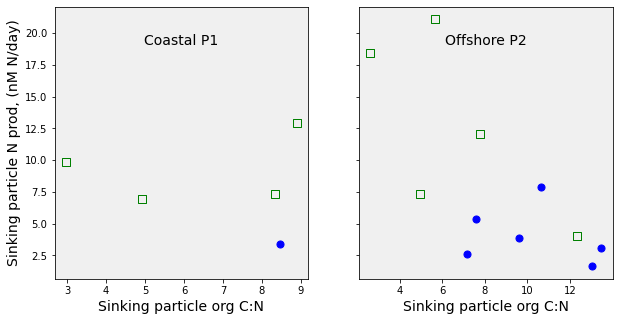

In [38]:
# Two panel - for P1 and P2 - with years plotted as different colors/markers

fig2, (ax2, ax3) = plt.subplots(1,2,sharey=True, figsize=(10, 5))

# P1 scattter of n2 rates (y) vs cn (x)
P1_2017.plot(ax = ax2, kind='scatter', x='C:N organic', y='Adjusted N prod (nM N/day)', c='Blue', s = 50)
P1_2018.plot(ax = ax2, kind='scatter', x='C:N organic', y='Adjusted N prod (nM N/day)', c='#f0f0f0', \
             edgecolors='Green', marker = 's', s = 50)

ax2.set_ylabel('Sinking particle N prod, (nM N/day)', fontsize = 14)
ax2.set_xlabel('Sinking particle org C:N', fontsize = 14)

ax2.set_facecolor('#f0f0f0')

ax2.annotate('Coastal P1', xy=(6, 6), 
            xytext=(0.5, 0.9), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# P2 scattter of n2 rates (y) vs cn (x)
P2_2017.plot(ax = ax3, kind='scatter', x='C:N organic', y='Adjusted N prod (nM N/day)', c='Blue', s = 50)
P2_2018.plot(ax = ax3, kind='scatter', x='C:N organic', y='Adjusted N prod (nM N/day)', c='#f0f0f0', \
             edgecolors='Green', marker = 's', s = 50)

ax3.set_xlabel('Sinking particle org C:N', fontsize = 14)

ax3.set_facecolor('#f0f0f0')

ax3.annotate('Offshore P2', xy=(6, 6), 
            xytext=(0.5, 0.9), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )